In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
df = pd.read_excel('resultados_45g.xlsx', sheet_name=['dados_radial',"dados_wall", "dados_axis", "dados_wall_tail"])
u_inlet = 2.735278
R = 0.025
Ub = 0.984712482

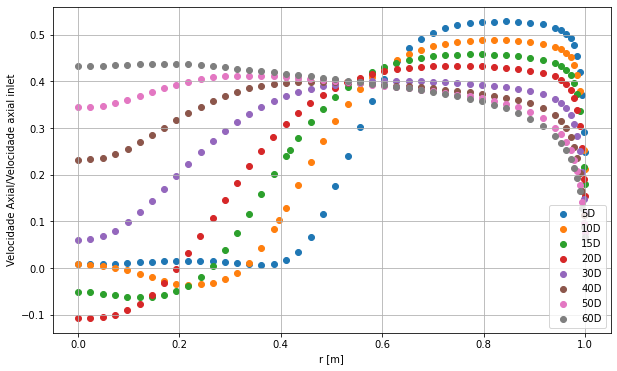

In [109]:
#Gráfico Velocidade axial
plt.figure(figsize=(10, 6))
plt.scatter(df['dados_radial']['r_5d'].div(R), df['dados_radial']['vel_axial_5d'].div(u_inlet), label='5D')
plt.scatter(df['dados_radial']['r_10d'].div(R), df['dados_radial']['vel_axial_10d'].div(u_inlet), label='10D')
plt.scatter(df['dados_radial']['r_15d'].div(R), df['dados_radial']['vel_axial_15d'].div(u_inlet), label='15D')
plt.scatter(df['dados_radial']['r_20d'].div(R), df['dados_radial']['vel_axial_20d'].div(u_inlet), label='20D')
plt.scatter(df['dados_radial']['r_30d'].div(R), df['dados_radial']['vel_axial_30d'].div(u_inlet), label='30D')
plt.scatter(df['dados_radial']['r_40d'].div(R), df['dados_radial']['vel_axial_40d'].div(u_inlet), label='40D')
plt.scatter(df['dados_radial']['r_50d'].div(R), df['dados_radial']['vel_axial_50d'].div(u_inlet), label='50D')
plt.scatter(df['dados_radial']['r_60d'].div(R), df['dados_radial']['vel_axial_60d'].div(u_inlet), label='60D')
plt.xlabel("r [m]")
plt.ylabel("Velocidade Axial/Velocidade axial inlet")
plt.grid(True)
plt.savefig('vel_axial_radial.png')
plt.legend(loc="lower right");
plt.show;

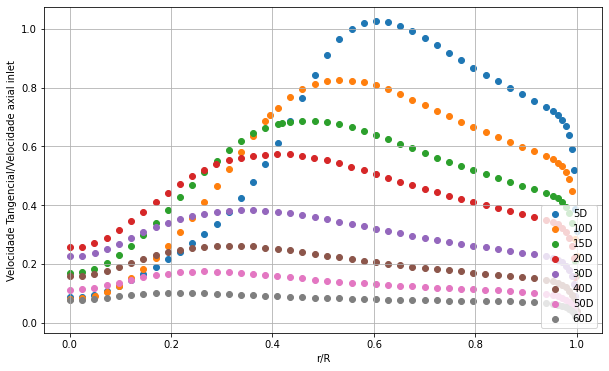

In [108]:
#Gráfico Velocidade tangencial
plt.figure(figsize=(10, 6))
plt.scatter(df['dados_radial']['r_5d'].div(R), df['dados_radial']['vel_tang_5d'].div(u_inlet), label='5D')
plt.scatter(df['dados_radial']['r_10d'].div(R), df['dados_radial']['vel_tang_10d'].div(u_inlet), label='10D')
plt.scatter(df['dados_radial']['r_15d'].div(R), df['dados_radial']['vel_tang_15d'].div(u_inlet), label='15D')
plt.scatter(df['dados_radial']['r_20d'].div(R), df['dados_radial']['vel_tang_20d'].div(u_inlet), label='20D')
plt.scatter(df['dados_radial']['r_30d'].div(R), df['dados_radial']['vel_tang_30d'].div(u_inlet), label='30D')
plt.scatter(df['dados_radial']['r_40d'].div(R), df['dados_radial']['vel_tang_40d'].div(u_inlet), label='40D')
plt.scatter(df['dados_radial']['r_50d'].div(R), df['dados_radial']['vel_tang_50d'].div(u_inlet), label='50D')
plt.scatter(df['dados_radial']['r_60d'].div(R), df['dados_radial']['vel_tang_60d'].div(u_inlet), label='60D')
plt.xlabel("r/R")
plt.ylabel("Velocidade Tangencial/Velocidade axial inlet")
plt.grid(True)
plt.savefig('vel_tang_radial.png')
plt.legend(loc="lower right");
plt.show;

In [97]:
S_5d = (2*np.pi*(np.trapz((df['dados_radial']['vel_axial_5d']*df['dados_radial']['r_5d']*df['dados_radial']['vel_tang_5d']*df['dados_radial']['r_5d']), df['dados_radial']['r_5d'])))/(np.pi*(R**3)*(Ub**2))
S_10d = (2*np.pi*(np.trapz((df['dados_radial']['vel_axial_10d']*df['dados_radial']['r_10d']*df['dados_radial']['vel_tang_10d']*df['dados_radial']['r_10d']), df['dados_radial']['r_10d'])))/(np.pi*(R**3)*(Ub**2))
S_15d = (2*np.pi*(np.trapz((df['dados_radial']['vel_axial_15d']*df['dados_radial']['r_15d']*df['dados_radial']['vel_tang_15d']*df['dados_radial']['r_15d']), df['dados_radial']['r_15d'])))/(np.pi*(R**3)*(Ub**2))
S_20d = (2*np.pi*(np.trapz((df['dados_radial']['vel_axial_20d']*df['dados_radial']['r_20d']*df['dados_radial']['vel_tang_20d']*df['dados_radial']['r_20d']), df['dados_radial']['r_20d'])))/(np.pi*(R**3)*(Ub**2))
S_30d = (2*np.pi*(np.trapz((df['dados_radial']['vel_axial_30d']*df['dados_radial']['r_30d']*df['dados_radial']['vel_tang_30d']*df['dados_radial']['r_30d']), df['dados_radial']['r_30d'])))/(np.pi*(R**3)*(Ub**2))
S_40d = (2*np.pi*(np.trapz((df['dados_radial']['vel_axial_40d']*df['dados_radial']['r_40d']*df['dados_radial']['vel_tang_40d']*df['dados_radial']['r_40d']), df['dados_radial']['r_40d'])))/(np.pi*(R**3)*(Ub**2))
S_50d = (2*np.pi*(np.trapz((df['dados_radial']['vel_axial_50d']*df['dados_radial']['r_50d']*df['dados_radial']['vel_tang_50d']*df['dados_radial']['r_50d']), df['dados_radial']['r_50d'])))/(np.pi*(R**3)*(Ub**2))
S_60d = (2*np.pi*(np.trapz((df['dados_radial']['vel_axial_60d']*df['dados_radial']['r_60d']*df['dados_radial']['vel_tang_60d']*df['dados_radial']['r_60d']), df['dados_radial']['r_60d'])))/(np.pi*(R**3)*(Ub**2))
S_tot = S_5d,S_10d,S_15d,S_20d,S_30d,S_40d,S_50d,S_60d
x = (5,10,15,20,30,40,50,60)

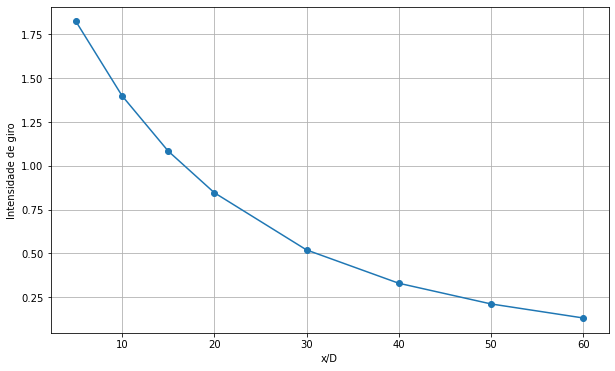

In [107]:
#Gráfico Swirl Number
plt.figure(figsize=(10, 6))
plt.plot(x, S_tot,marker='o')
plt.xlabel("x/D")
plt.ylabel("Intensidade de giro")
plt.grid(True)
plt.savefig('intensidade_giro.png')
#plt.legend(loc="lower right");
plt.show;